 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [19]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [20]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df= pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [21]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [22]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [23]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df= pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [24]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [25]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [26]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df= pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [27]:
# Check Data Types
sp500_df.isnull().sum()
sp500_df.dtypes

Close    object
dtype: object

In [28]:
# Fix Data Types
sp500_df["Close"]= sp500_df["Close"].str.replace("$", " ")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [29]:
# Calculate Daily Returns
sp500daily_df= sp500_df.astype(float).pct_change()
sp500daily_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [30]:
# Drop nulls
sp500daily_df.dropna(inplace=True)
sp500daily_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [31]:
# Rename Column
sp500daily_df= sp500daily_df.rename(columns={"Close": "S&P 500"})
sp500daily_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
# Concatenate all DataFrames into a single DataFrame
allreturns_df = pd.concat([whale_df, algo_df, sp500daily_df], axis="columns", join ="inner")
allreturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

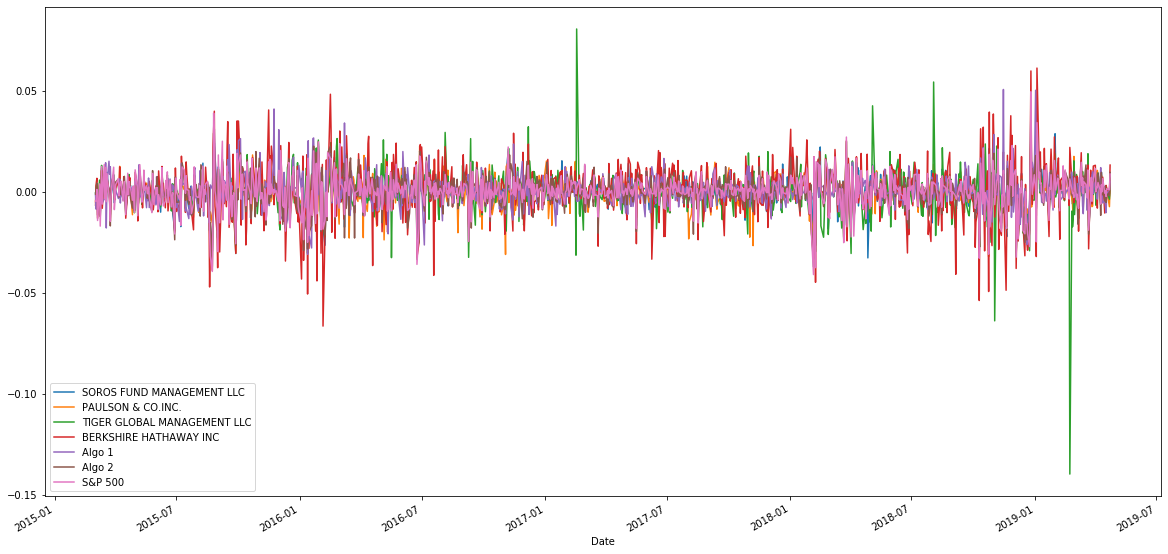

In [33]:
# Plot daily returns
allreturns_df.plot(figsize=(20,10))

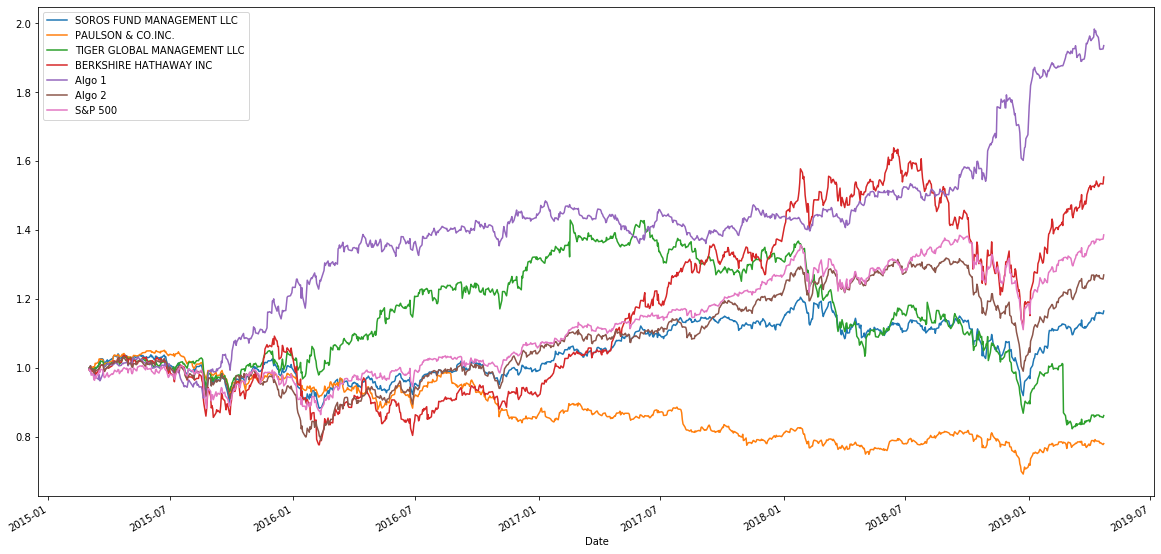

In [34]:
# Plot cumulative returns
cumulative_returns = (1+ allreturns_df).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(20,10))


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

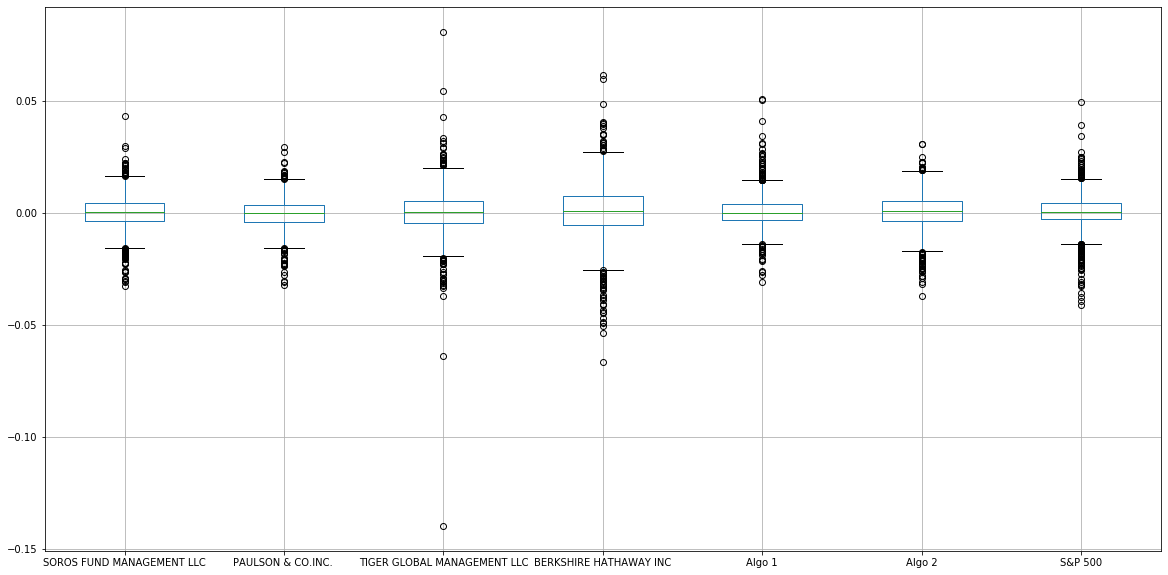

In [35]:
# Box plot to visually show risk
allreturns_df.boxplot(figsize=(20,10))

In [38]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500? Tiger Global and Berkshire Hathway by manual observation
allreturns_std = allreturns_df.std()
allreturns_std

# Determine which portfolios are riskier than the S&P 500
riskier = allreturns_std[allreturns_std > allreturns_std["S&P 500"]]
print(f"The following stocks are riskier than S&P 500 \n {riskier}")

The following stocks are riskier than S&P 500 
 TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [39]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std= allreturns_std * np.sqrt(252) 
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

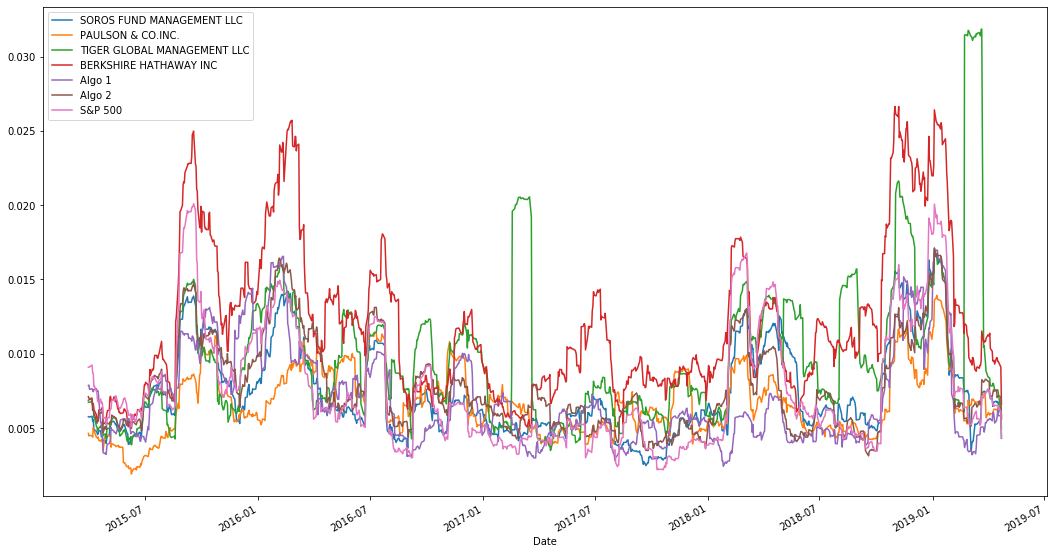

In [40]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling = allreturns_df.rolling(window=21).std().plot(figsize =[18,10])
rolling

In [41]:
# Construct a correlation table
correlation = allreturns_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


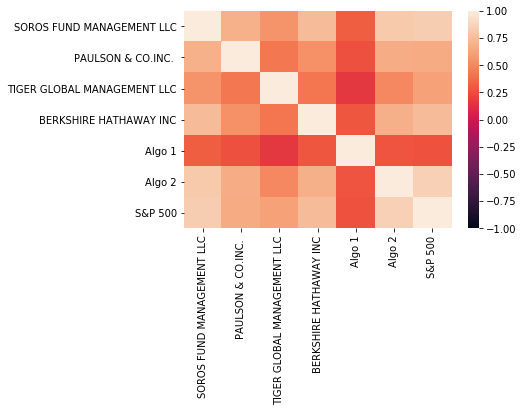

In [42]:
# Construct a HeatMap
sns.heatmap(correlation, vmin=-1, vmax=1)


In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing) Tiger Global
variance = allreturns_df["S&P 500"].var()
covariance = allreturns_df["TIGER GLOBAL MANAGEMENT LLC"].cov(allreturns_df["S&P 500"])
beta_tiger = covariance / variance

beta_tiger

0.7946528805681052

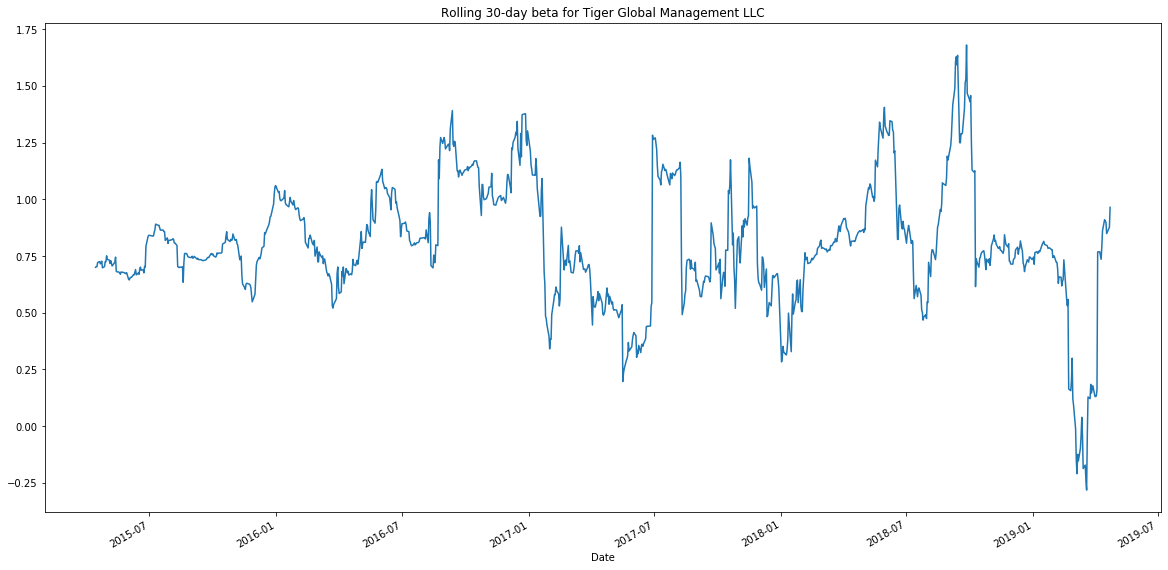

In [44]:
rolling_variance = allreturns_df["S&P 500"].rolling(window=30).var()
rolling_covariance = allreturns_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=30).cov(allreturns_df["S&P 500"])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=[20,10], title="Rolling 30-day beta for Tiger Global Management LLC")

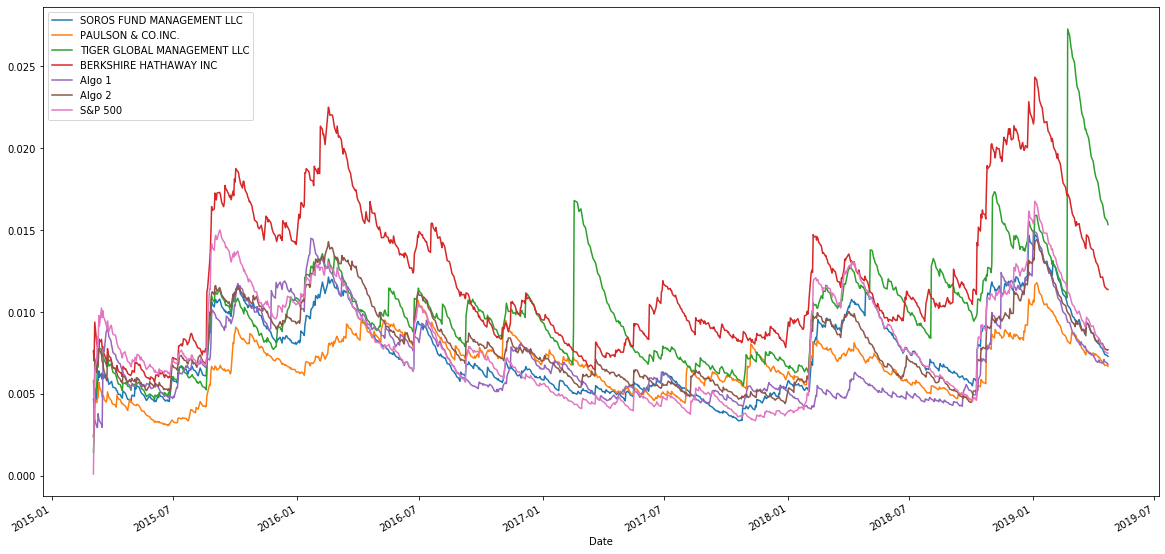

In [45]:
# Calculate a rolling window using the exponentially weighted moving average. 
expo_wma = allreturns_df.ewm(halflife=21).std().plot(figsize=[20,10])
expo_wma

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [46]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (allreturns_df.mean()*252)/ (allreturns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

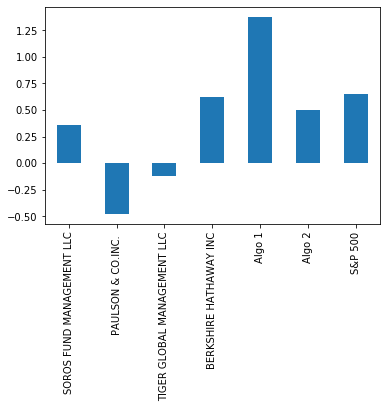

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---Algo 1 outperforms both the whales and the market but not algo 2.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [48]:
# Read the first stock
Path.cwd()
stock1_csv= Path("Resources/goog_historical.csv")
stock_1 = pd.read_csv(stock1_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
stock_1 = stock_1.rename(columns={"NOCP":"GOOG"})
stock_1.drop(columns=["Symbol"], inplace=True)
stock_1.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [49]:
# Read the second stock
stock2_csv= Path("Resources/aapl_historical.csv")
stock_2 = pd.read_csv(stock2_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
stock_2 = stock_2.rename(columns={"NOCP":"AAPL"})
stock_2.drop(columns=["Symbol"], inplace=True)
stock_2.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [50]:
# Read the third stock
stock3_csv= Path("Resources/cost_historical.csv")
stock_3 = pd.read_csv(stock3_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
stock_3 = stock_3.rename(columns={"NOCP":"COST"})
stock_3.drop(columns=["Symbol"], inplace=True)
stock_3.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [51]:
# Concatenate all stocks into a single DataFrame
portfolio = pd.concat([stock_1, stock_2, stock_3], axis="columns", join="outer")
portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [52]:
# Sort the index
portfolio.sort_index(inplace=True)
portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [53]:
# Calculate the nulls
portfolio.isnull().sum()

GOOG    0
AAPL    0
COST    0
dtype: int64

In [54]:
# Calculate daily returns
portfolio_daily = portfolio.pct_change().dropna()
portfolio_daily.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [55]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = portfolio_daily.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [56]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_portfolio = pd.concat([allreturns_df, portfolio_returns], axis="columns", join="outer")
custom_portfolio = custom_portfolio.rename(columns={0: "Custom"})


In [57]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_portfolio.dropna(inplace=True)
custom_portfolio.sort_index(inplace=True)
custom_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [58]:
# Risk
custom_risk = custom_portfolio.std()
custom_risk

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.013323
dtype: float64

In [59]:
custom_risk_annualised = custom_risk * np.sqrt(252)
custom_risk_annualised

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

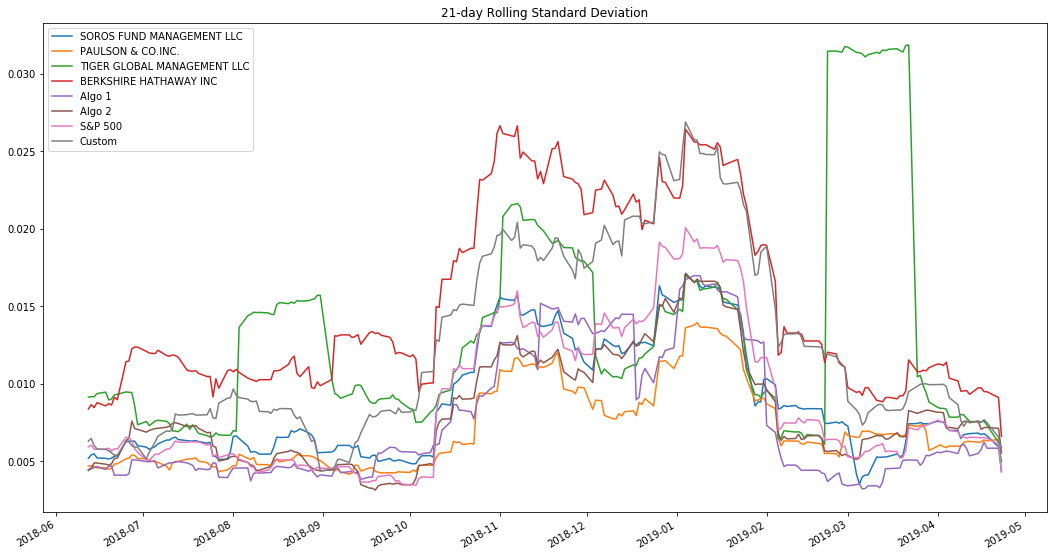

In [60]:
# Rolling
custom_rolling = custom_portfolio.rolling(window=21).std().plot(figsize =[18,10], title="21-day Rolling Standard Deviation")
custom_rolling

In [61]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (custom_portfolio.mean()*252)/ (custom_portfolio.std() * np.sqrt(252))
custom_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

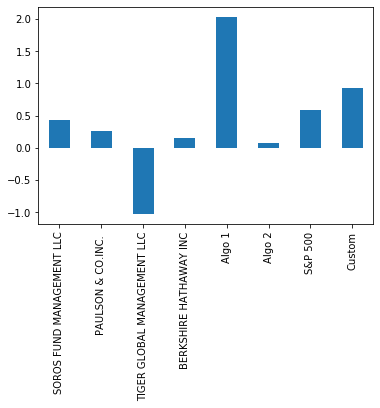

In [62]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind="bar")

In [63]:
# Create a correlation analysis
custom_correlation = custom_portfolio.corr()
custom_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


In [64]:
# Beta
custom_variance = custom_portfolio["S&P 500"].var()
custom_covariance = custom_portfolio["Custom"].cov(custom_portfolio["S&P 500"])
beta_custom = custom_covariance/ custom_variance
beta_custom

1.2127120076458702

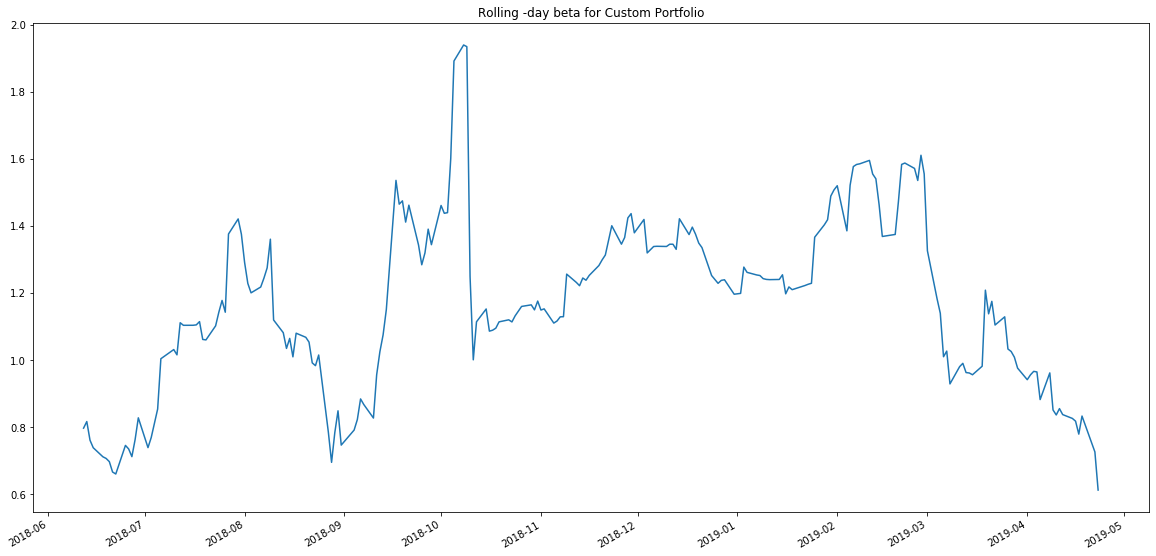

In [65]:

custom_rolling_variance = custom_portfolio["S&P 500"].rolling(window=21).var()
custom_rolling_covariance = custom_portfolio["Custom"].rolling(window=21).cov(custom_portfolio["S&P 500"])
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=[20,10], title="Rolling -day beta for Custom Portfolio")